In [2]:
import numpy as np
from matplotlib.pyplot import figure
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import pandas as pd
from definitions import ROOT_DIR
%cd $ROOT_DIR


/home/x/doc/dev/master/CancerTherapyPrediction


In [3]:


def compare_parameters(fullParams, parameters, labels,title ):  # fullParams, [threesixth,fivesixth,sixsixth] , ['1/2','5/6','6/6']
    figure(figsize=(20, 6), dpi=80)

    i=0
    for partialParams, label in zip(parameters,labels):

        proportions = []
        sorted(fullParams.keys(), key=lambda x:x.lower())

        X_axis = np.arange(len(fullParams))

        X = fullParams.keys()

        for (k,v) in fullParams.items():
            proportion = partialParams[k]/fullParams[k]*100
            # print(f"{k} {proportion:.2f}% ")
            proportions.append(proportion)
        plt.bar(X_axis +i, proportions, 0.25, label=label)
        i+=0.25


    plt.xticks(X_axis, X)
    plt.xlabel("Groups")
    plt.ylabel("nowa wartość / wartość w modelu pełnym [%]")
    plt.title(title)
    plt.legend()
    plt.show()


# Training9Linsp

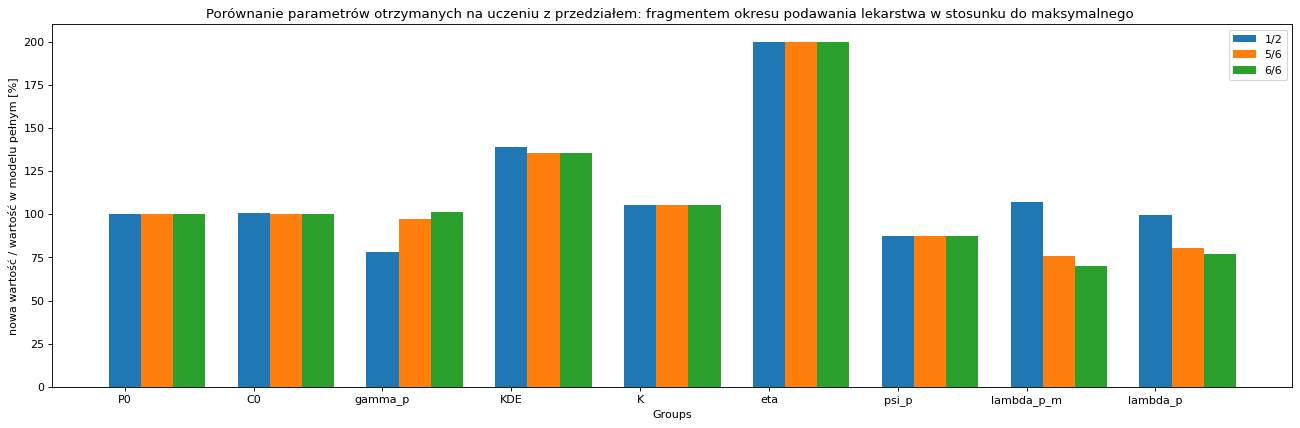

In [22]:
#wziąto pod uwagę co 1step

threesixth = {'P0': 1741867, 'C0': 0.3027635766261936, 'gamma_p': 0.20404838186665247, 'KDE': 0.06935515209593586, 'K': 1900000.0653516473, 'eta': 0.2, 'psi_p': 0.05012194261577609, 'lambda_p_m': 0.09667716684486889, 'lambda_p': 0.14679910946064498}

fivesixth = {'P0': 1741867, 'C0': 0.30000000008297634, 'gamma_p': 0.25389663238988214, 'KDE': 0.06779097962044832, 'K': 1900000.0338206063, 'eta': 0.2, 'psi_p': 0.05000000005593625, 'lambda_p_m': 0.06860679348824308, 'lambda_p': 0.11860679354417933}

sixsixth = {'P0': 1741867, 'C0': 0.3000000000849464, 'gamma_p': 0.2638415182169818, 'KDE': 0.06772912625477959, 'K': 1900000.0284421386, 'eta': 0.2, 'psi_p': 0.05000000006041046, 'lambda_p_m': 0.06310224987705068, 'lambda_p': 0.11310224993746114}

fullParams = {'P0': 1741867, 'C0': 0.30000000000000004, 'gamma_p': 0.26068553617550844, 'KDE': 0.05000000000004916, 'K': 1807530.2223988457, 'eta': 0.10000000000000024, 'psi_p': 0.05714603743116588, 'lambda_p_m': 0.09027214899709243, 'lambda_p': 0.14741818642825832}
fullParams_annealing = {'P0': 1741867, 'C0': 0.3, 'gamma_p': 0.2606842553507444, 'KDE': 0.05, 'K': 1865074.2526920114, 'eta': 0.1, 'psi_p': 0.06183867745881324, 'lambda_p_m': 0.09027148133786354, 'lambda_p': 0.15211015879667678}

# porownanie parametrów
# for (k,v) in fullParams.items():
#     comparison = fullParams_annealing[k]/fullParams[k]*100
#     print(f"{k} {comparison:.2f}% ")

compare_parameters(fullParams, [threesixth,fivesixth,sixsixth] , ['1/2','5/6','6/6'],"Porównanie parametrów otrzymanych na uczeniu z przedziałem: fragmentem okresu podawania lekarstwa w stosunku do maksymalnego " )

# Training12LinspKlusekShortEachIter.py
dPdt = lambda_p * P*(1-P/K) - psi_p*P - gamma_p * unit_step_fun(C,eta)  * P

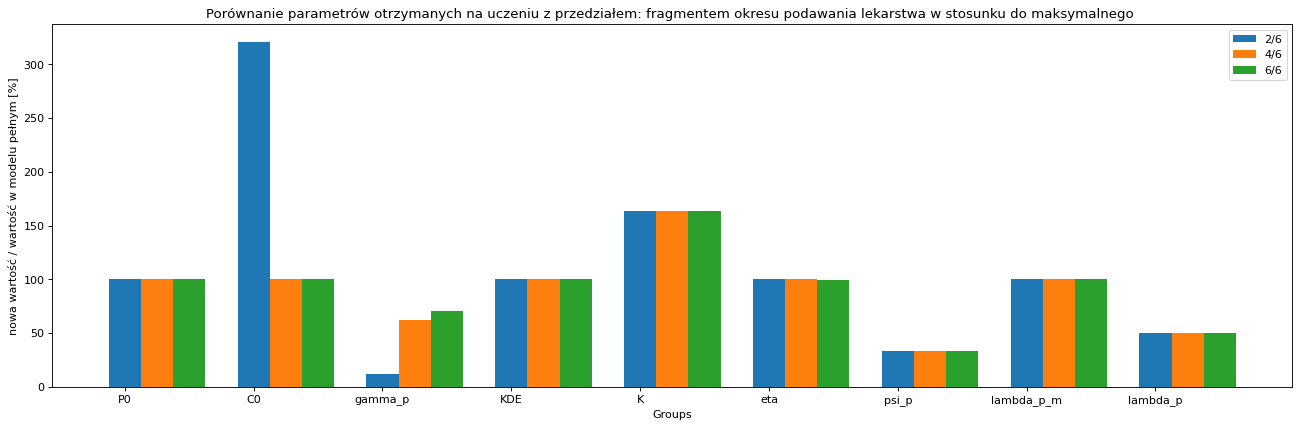

In [19]:
twosixth ={'P0': 1578183, 'C0': 9.632710657444402, 'gamma_p': 0.00010894881370356557, 'KDE': 0.00044991509877650835, 'K': 2999999.9999999995, 'eta': 0.29999999999999993, 'psi_p': 0.0005000000000000001, 'lambda_p_m': 0.0005000000000000001, 'lambda_p': 0.0010000000000000002}

foursixth ={'P0': 1578183, 'C0': 3.0119676160235924, 'gamma_p': 0.0005772820075974603, 'KDE': 0.00044991514447489424, 'K': 2999999.9998557013, 'eta': 0.299999963313338, 'psi_p': 0.0005000000000082389, 'lambda_p_m': 0.0005000001566952485, 'lambda_p': 0.0010000001567034874}


sixsixth ={'P0': 1578183, 'C0': 3.015738887397464, 'gamma_p': 0.0006488422104169736, 'KDE': 0.00045229521030090003, 'K': 2999999.999955969, 'eta': 0.2980953185351184, 'psi_p': 0.0005000000001145388, 'lambda_p_m': 0.0005011446804481998, 'lambda_p': 0.0010011446805627386}


maximal ={'P0': 1578183, 'C0': 3.0000000000876295, 'gamma_p': 0.000921608661369091, 'KDE': 0.00044991509877650835, 'K': 1833437.6769648865, 'eta': 0.29999999999999993, 'psi_p': 0.0015093473209401896, 'lambda_p_m': 0.0005000000000000001, 'lambda_p': 0.0020093473209401897}

compare_parameters(maximal, [twosixth,foursixth,sixsixth] , ['2/6','4/6','6/6'],"Porównanie parametrów otrzymanych na uczeniu z przedziałem: fragmentem okresu podawania lekarstwa w stosunku do maksymalnego " )

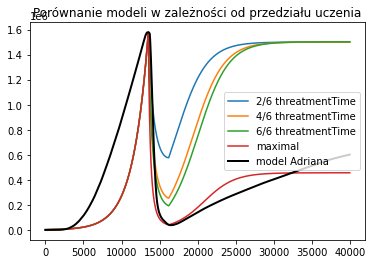

In [25]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.patient3.config import threatment_start, threatment_end,threatment2_start

def unit_step_fun(x,threshold):
    return x*(1 / 2 + 1 / 2 *np.tanh(100 * (x-threshold)))
def differentialForward(y, t, paras):
    [P, C] = y
    lambda_p = paras['lambda_p']
    psi_p = paras['psi_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']
    eta = eta*paras['C0']
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K) - psi_p*P - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]

def differentialBackward(y, t, paras):
    [P, C] = y
    lambda_p = paras['lambda_p']
    psi_p = paras['psi_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']
    eta = eta*paras['C0']
    dCdt =-KDE * C
    dPdt = lambda_p * P  - psi_p*P - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]


USE_REAL_TIME = False
threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/patient3/stats_wszystkie_iteracje.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)

plot_parameters(differentialForward,twosixth,steps_forward,steps_backward,threatment_start,"2/6 threatmentTime",USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,foursixth,steps_forward,steps_backward,threatment_start,"4/6 threatmentTime",USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,sixsixth,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,maximal,steps_forward,steps_backward,threatment_start,"maximal",USE_REAL_TIME,t_real,differentialBackward=differentialBackward)



plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Porównanie modeli w zależności od przedziału uczenia")
plt.legend()
plt.show()

# Training13LinspKlusekShortEachIterLinear.py
dPdt = lambda_p * P*(1-P/K)  - alpha*t - gamma_p * unit_step_fun(C,eta)  * P


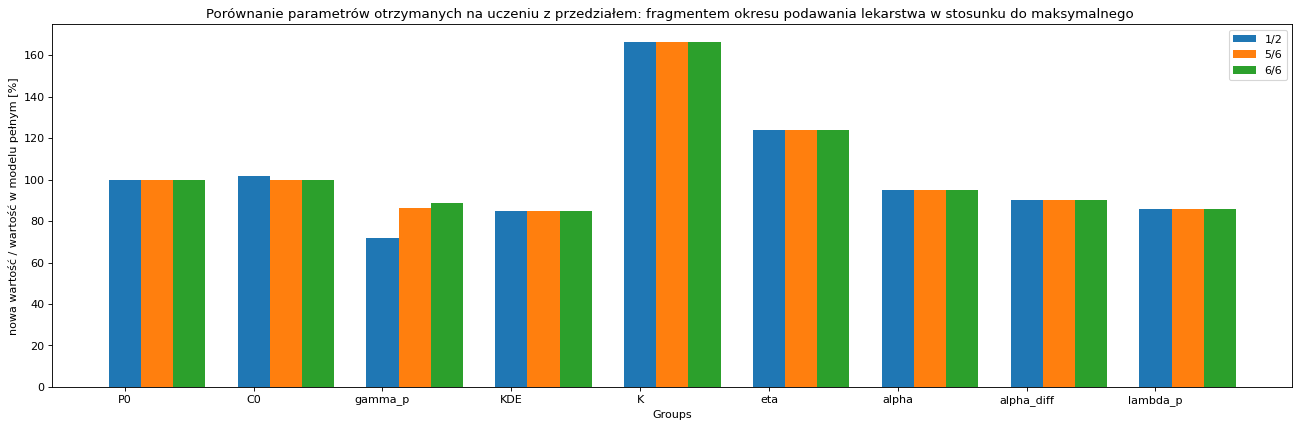

In [35]:
#wziąto pod uwagę co 1step
twosixth = {'P0': 1578183, 'C0': 3.046479523664936, 'gamma_p': 0.00045138352522655937, 'KDE': 0.00044991509877651383, 'K': 2999999.999749261, 'eta': 0.2999999999999955, 'alpha': 5e-06, 'alpha_diff': 15.000000000000611, 'lambda_p': 7.500000000000306e-05}

foursixth = {'P0': 1578183, 'C0': 3.0003485280513806, 'gamma_p': 0.0005424607534442532, 'KDE': 0.0004499150987765088, 'K': 2999999.999999944, 'eta': 0.2999999999999996, 'alpha': 5e-06, 'alpha_diff': 15.000000000000231, 'lambda_p': 7.500000000000116e-05}

sixsixth = {'P0': 1578183, 'C0': 3.000224519429239, 'gamma_p': 0.000558085709592946, 'KDE': 0.0004499150987765093, 'K': 2999999.9999999944, 'eta': 0.29999999999999916, 'alpha': 5.000000000004441e-06, 'alpha_diff': 15.000000000002899, 'lambda_p': 7.500000000008112e-05}

maximal ={'P0': 1578183, 'C0': 3.0001046341507203, 'gamma_p': 0.0006277530244156134, 'KDE': 0.0005304557712284162, 'K': 1801293.3100846584, 'eta': 0.24183499026463035, 'alpha': 5.256099560277746e-06, 'alpha_diff': 16.625711306862783, 'lambda_p': 8.738639388930623e-05}


compare_parameters(maximal, [twosixth,foursixth,sixsixth] , ['1/2','5/6','6/6'],"Porównanie parametrów otrzymanych na uczeniu z przedziałem: fragmentem okresu podawania lekarstwa w stosunku do maksymalnego " )

In [36]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.patient3.config import threatment_start, threatment_end,threatment2_start

def unit_step_fun(x,threshold):
    return x*(1 / 2 + 1 / 2 *np.tanh(100 * (x-threshold)))
def differentialEquation(y, t, paras):
    [P, C] = y
    alpha = paras['alpha']
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']
    eta = eta*paras['C0']
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - alpha*t - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]


USE_REAL_TIME = False
threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/patient3/stats_wszystkie_iteracje.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)

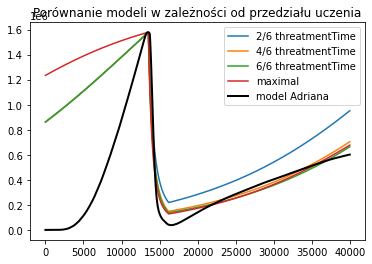

In [37]:
plot_parameters(differentialEquation,twosixth,steps_forward,steps_backward,threatment_start,"2/6 threatmentTime",USE_REAL_TIME,t_real)

plot_parameters(differentialEquation,foursixth,steps_forward,steps_backward,threatment_start,"4/6 threatmentTime",USE_REAL_TIME,t_real)

plot_parameters(differentialEquation,sixsixth,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real)

plot_parameters(differentialEquation,maximal,steps_forward,steps_backward,threatment_start,"maximal",USE_REAL_TIME,t_real)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Porównanie modeli w zależności od przedziału uczenia")
plt.legend()
plt.show()

##### porównanie co tysięczna iteracja vs oryginał uczenie od start_threatment1 do start_threatment2

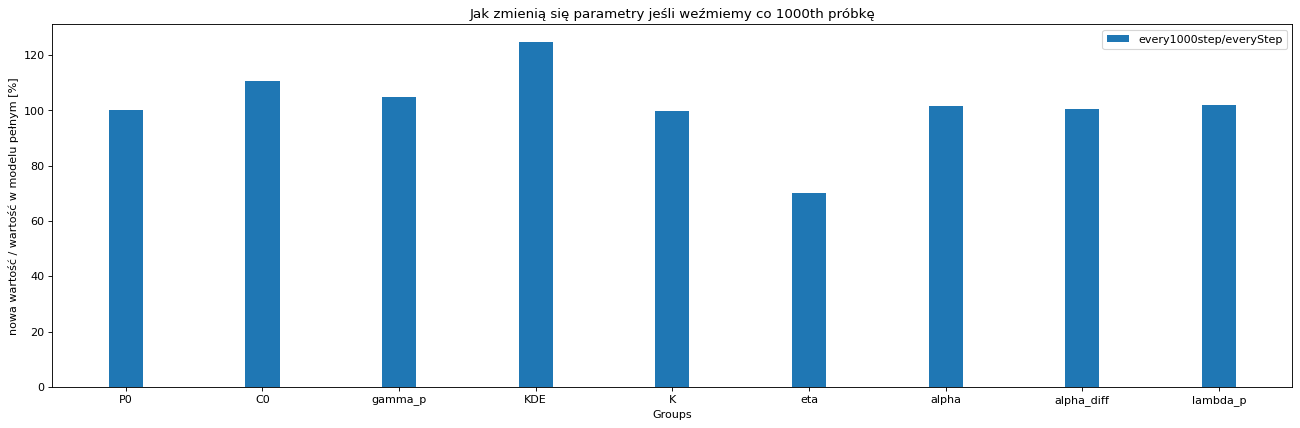

In [38]:
every1000 = {'P0': 1578183, 'C0': 3.314739096966354, 'gamma_p': 0.0006572784979895304, 'KDE': 0.0006623402715542321, 'K': 1800169.068490772, 'eta': 0.1699208452265667, 'alpha': 5.344088519525684e-06, 'alpha_diff': 16.69356077563314, 'lambda_p': 8.921186649106534e-05}

everyIter ={'P0': 1578183, 'C0': 3.0001046341507203, 'gamma_p': 0.0006277530244156134, 'KDE': 0.0005304557712284162, 'K': 1801293.3100846584, 'eta': 0.24183499026463035, 'alpha': 5.256099560277746e-06, 'alpha_diff': 16.625711306862783, 'lambda_p': 8.738639388930623e-05}

compare_parameters(everyIter, [every1000] , ['every1000step/everyStep'],"Jak zmienią się parametry jeśli weźmiemy co 1000th próbkę" )


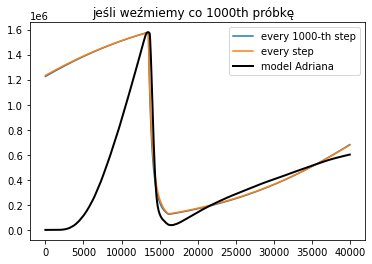

In [40]:
plot_parameters(differentialEquation,every1000,steps_forward,steps_backward,threatment_start,"every 1000-th step",USE_REAL_TIME,t_real)

plot_parameters(differentialEquation,everyIter,steps_forward,steps_backward,threatment_start,"every step",USE_REAL_TIME,t_real)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("jeśli weźmiemy co 1000th próbkę  ")
plt.legend()
plt.show()


# Training15LinspKlusekShortEachIterLinear.py
dPdt = lambda_p * P*(1-P/K) - gamma_p * unit_step_fun(C,eta)  * P

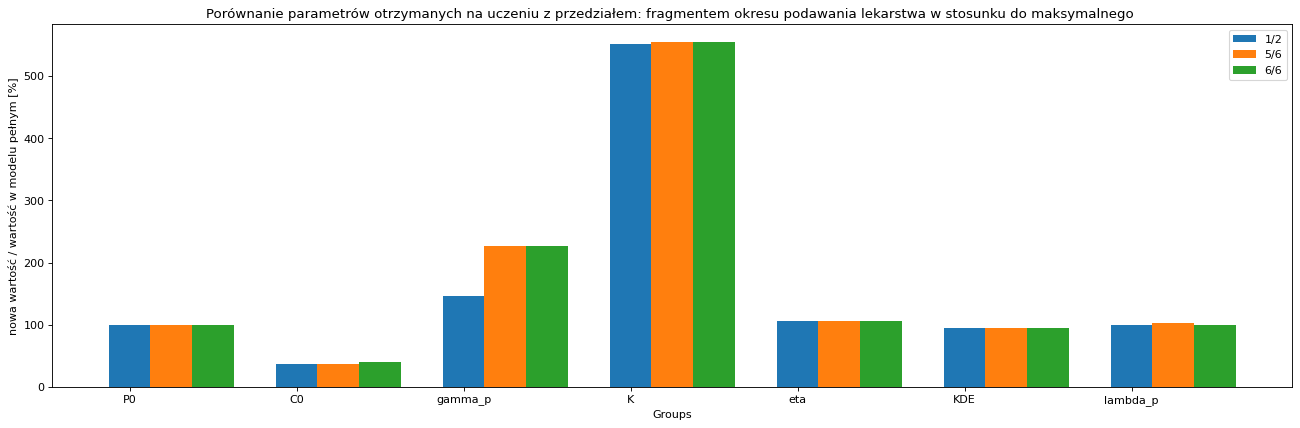

In [7]:
twosixth ={'P0': 1578183, 'C0': 3.600637409549674, 'gamma_p': 0.00029330165148056474, 'K': 9940711.59329584, 'eta': 0.3, 'KDE': 0.00044991509877650824, 'lambda_p': 0.00010000001764542758}


foursixth ={'P0': 1578183, 'C0': 3.534384828011842, 'gamma_p': 0.00045492181178770385, 'K': 9998958.80027214, 'eta': 0.29999999937591026, 'KDE': 0.0004499150995538995, 'lambda_p': 0.00010374931955309018}


sixsixth ={'P0': 1578183, 'C0': 3.794674881380904, 'gamma_p': 0.00045423057510134385, 'K': 9999999.999326298, 'eta': 0.29999802076529725, 'KDE': 0.00044991756419906896, 'lambda_p': 0.00010000011561389551}


maximal ={'P0': 1578183, 'C0': 9.580054434387815, 'gamma_p': 0.00020043448148424222, 'K': 1800009.8388459147, 'eta': 0.2821441111244175, 'KDE': 0.00047284652698822814, 'lambda_p': 0.00010037182386318592}



compare_parameters(maximal, [twosixth,foursixth,sixsixth] , ['1/2','5/6','6/6'],"Porównanie parametrów otrzymanych na uczeniu z przedziałem: fragmentem okresu podawania lekarstwa w stosunku do maksymalnego " )

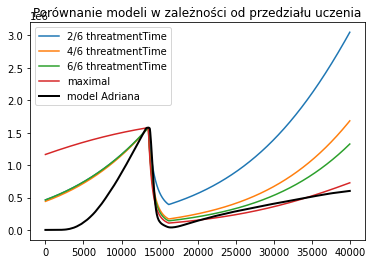

In [34]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.patient3.config import threatment_start, threatment_end, threatment2_start
from asymilacja.model.Cancer6LinspKlusekShortEachIterLinear import differentialEquation_15

USE_REAL_TIME = False
threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/patient3/stats_wszystkie_iteracje.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration'] <= threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)

plot_parameters(differentialEquation_15, twosixth, steps_forward, steps_backward, threatment_start, "2/6 threatmentTime",
                USE_REAL_TIME, t_real)

plot_parameters(differentialEquation_15, foursixth, steps_forward, steps_backward, threatment_start, "4/6 threatmentTime",
                USE_REAL_TIME, t_real)

plot_parameters(differentialEquation_15, sixsixth, steps_forward, steps_backward, threatment_start, "6/6 threatmentTime",
                USE_REAL_TIME, t_real)

plot_parameters(differentialEquation_15, maximal, steps_forward, steps_backward, threatment_start, "maximal",
                USE_REAL_TIME, t_real)

plot_truth(t_true, P_true, USE_REAL_TIME, t_real)

plt.title("Porównanie modeli w zależności od przedziału uczenia")
plt.legend()
plt.show()


##### porównanie co tysięczna iteracja vs oryginał uczenie 6/6Threatment

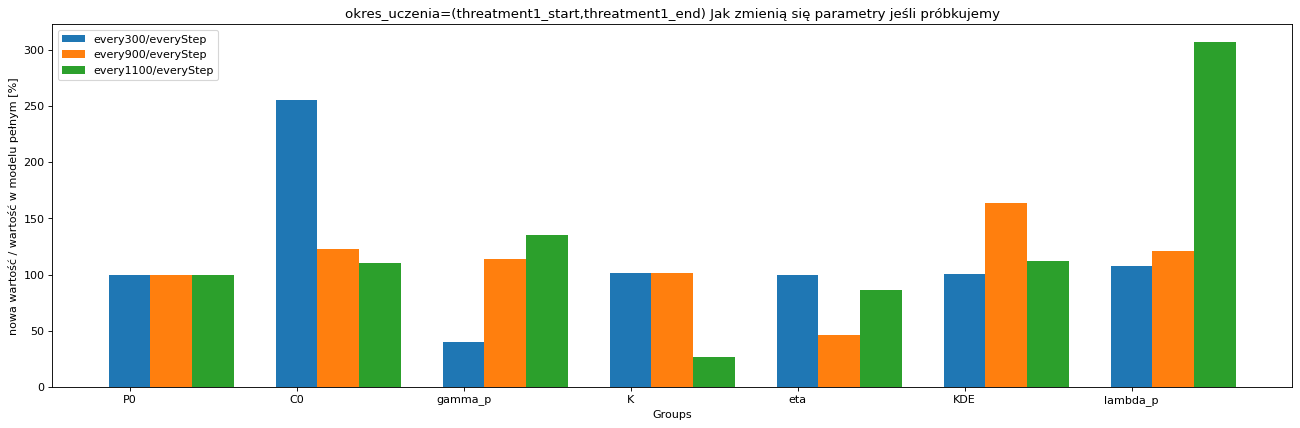

In [30]:
##### porównanie co n-ta iteracja, okres_uczenia=(threatment1_start,threatment1_end)
every5 ={'P0': 1578183, 'C0': 6.077704112115916, 'gamma_p': 0.00028363550731361377, 'K': 9999999.856093349, 'eta': 0.29998289610861895, 'KDE': 0.0004499364046795618, 'lambda_p': 0.00010000103042488468}

every10 ={'P0': 1578183, 'C0': 3.7109864661059397, 'gamma_p': 0.00046374011048538183, 'K': 9899605.360017162, 'eta': 0.2999043281248106, 'KDE': 0.0004500342905224138, 'lambda_p': 0.00010070991030055519}


every20={'P0': 1578183, 'C0': 9.999038095277479, 'gamma_p': 0.00017679626337033886, 'K': 9998823.210351687, 'eta': 0.2990442049193043, 'KDE': 0.00045110757622556153, 'lambda_p': 0.0001493238824656536}


every300 = {'P0': 1578183, 'C0': 9.396991580423268, 'gamma_p': 0.00018530321314895598, 'K': 9999968.760165863, 'eta': 0.29951147573428005, 'KDE': 0.00045052412027375574, 'lambda_p': 0.00010823368631436148}


every900 ={'P0': 1578183, 'C0': 4.498715413237763, 'gamma_p': 0.0005339815688616243, 'K': 9999998.545915801, 'eta': 0.13913193857459377, 'KDE': 0.0007370450663964827, 'lambda_p': 0.00012201109760053857}

every1100={'P0': 1578183, 'C0': 4.060247265296541, 'gamma_p': 0.0006321817023097831, 'K': 2633764.6781276152, 'eta': 0.25917279902585233, 'KDE': 0.0005045815627954814, 'lambda_p': 0.00030916911231457125}


everyIter ={'P0': 1578183, 'C0': 3.6784703508920042, 'gamma_p': 0.0004677320925497225, 'K': 9873452.239118874, 'eta': 0.2999312308596649, 'KDE': 0.00045000077020591905, 'lambda_p': 0.00010065204656950708}


compare_parameters(everyIter, [every300,every900,every1100] , ['every300/everyStep','every900/everyStep','every1100/everyStep'],"okres_uczenia=(threatment1_start,threatment1_end) Jak zmienią się parametry jeśli próbkujemy" )


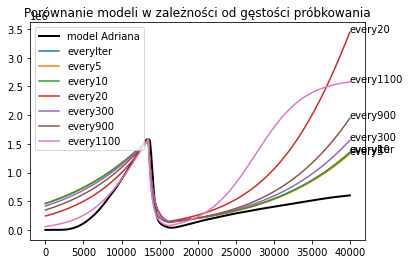

In [36]:

plot_truth(t_true, P_true, USE_REAL_TIME, t_real)
plot_parameters(differentialEquation_15, everyIter, steps_forward, steps_backward, threatment_start, "everyIter",
                USE_REAL_TIME, t_real,lineLabel="everyIter")

steps = [5,10,20,300,900,1100]
for i in steps:
    name = f"every{i}"
    parameters = globals()[name]

    plot_parameters(differentialEquation_15, parameters, steps_forward, steps_backward, threatment_start, name,
                    USE_REAL_TIME, t_real,lineLabel=name)



plt.title("Porównanie modeli w zależności od gęstości próbkowania")
plt.legend()
plt.show()
